In [55]:
# Génération de données pour Naive Bayes avec probabilité par classe
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [56]:
# Fixer le seed pour la reproductibilité
np.random.seed(42)

# Générer deux features pour une meilleure classification
# Feature 1 : valeur principale
feature1 = np.random.normal(loc=0, scale=1, size=200)

# Feature 2 : seconde caractéristique
feature2 = np.random.normal(loc=0, scale=1, size=200)

# Créer les classes basées sur une règle simple mais claire
# Classe 0: valeurs négatives de feature1, Classe 1: valeurs positives
y = np.where(feature1 < 0, 0, 1)

# Créer le DataFrame
naive_bayes_data = pd.DataFrame({
    'Feature1': feature1,
    'Feature2': feature2,
    'Class': y
})

# Afficher les premières lignes et la distribution des classes
print(naive_bayes_data.head())
print(f"\nDistribution des classes:\n{naive_bayes_data['Class'].value_counts()}")

   Feature1  Feature2  Class
0  0.496714  0.357787      1
1 -0.138264  0.560785      0
2  0.647689  1.083051      1
3  1.523030  1.053802      1
4 -0.234153 -1.377669      0

Distribution des classes:
Class
1    100
0    100
Name: count, dtype: int64


In [57]:
# Séparation des données en ensembles d'entraînement et de test
X = naive_bayes_data[['Feature1', 'Feature2']]
y = naive_bayes_data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Taille ensemble d'entraînement: {len(X_train)}")
print(f"Taille ensemble de test: {len(X_test)}")

Taille ensemble d'entraînement: 160
Taille ensemble de test: 40


In [58]:
#Creation du modèle Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

,"priors priors: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"var_smoothing var_smoothing: float, default=1e-9Portion of the largest variance of all features that is added tovariances for calculation stability... versionadded:: 0.20",1e-09


In [59]:
#test du modèle
predictions = model.predict(X_test)
print(predictions)

#test de la precision
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')

[0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1
 0 1 1]
Accuracy: 100.00%


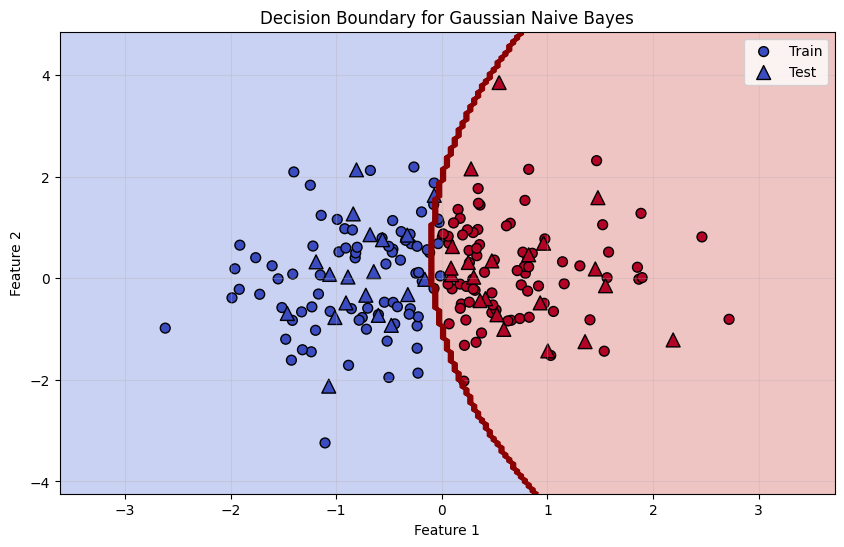

In [60]:
# Visualisation de la frontière de décision avec un mesh grid 2D
plt.figure(figsize=(10, 6))

# Créer une grille de points pour visualiser la frontière de décision
x_min, x_max = naive_bayes_data['Feature1'].min() - 1, naive_bayes_data['Feature1'].max() + 1
y_min, y_max = naive_bayes_data['Feature2'].min() - 1, naive_bayes_data['Feature2'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),np.linspace(y_min, y_max, 200))

grid_points = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['Feature1', 'Feature2'])
Z = model.predict(grid_points)
Z = Z.reshape(xx.shape)

# Afficher la zone de décision
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

# Tracer la frontière de décision
plt.contour(xx, yy, Z, colors='darkred', linewidths=2)

# Tracer les points d'entraînement
plt.scatter(X_train['Feature1'], X_train['Feature2'], c=y_train, cmap='coolwarm', 
            edgecolor='k', marker='o', s=50, label='Train')

# Tracer les points de test
plt.scatter(X_test['Feature1'], X_test['Feature2'], c=y_test, cmap='coolwarm', 
            edgecolor='k', marker='^', s=100, label='Test')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary for Gaussian Naive Bayes')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()